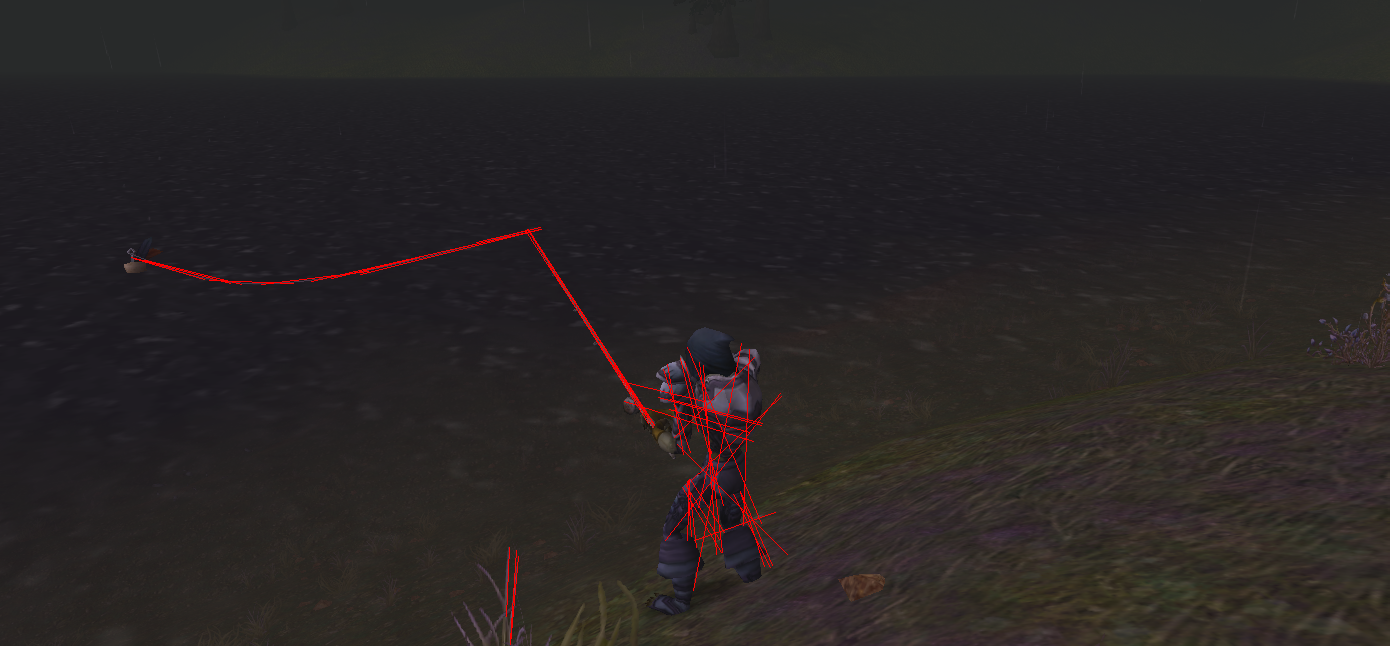

In [25]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

def highlight_segments(image, min_length):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 10, 250, apertureSize=3)
    
    # Detect line segments using the Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, 
                            rho=1, 
                            theta=np.pi/180, 
                            threshold=50, 
                            minLineLength=min_length, 
                            maxLineGap=20)
    
    # Highlight the detected line segments on the original image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return image

# Load the image
img_path = 'tmp/pole1.png'  # Replace with your image path
image = cv2.imread(img_path)

# Set the minimum length for line segments
min_length = 50  # You can change this value as needed

# Highlight segments
output_image = highlight_segments(image, min_length)

# Convert image to RGB (OpenCV uses BGR by default)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image (NumPy array) to a PIL image
pil_image = Image.fromarray(output_image_rgb)

# Display the image using IPython display
display(pil_image)

[(array([[671, 443, 758, 356]], dtype=int32), -45.0), (array([[674, 437, 754, 357]], dtype=int32), -45.0), (array([[459, 628, 517, 570]], dtype=int32), -45.0), (array([[659, 446, 756, 349]], dtype=int32), -45.0), (array([[655, 436, 742, 349]], dtype=int32), -45.0), (array([[660, 447, 752, 355]], dtype=int32), -45.0), (array([[681, 429, 757, 351]], dtype=int32), -45.744059202888714), (array([[655, 429, 706, 378]], dtype=int32), -45.0)]
[(array([[527, 229, 673, 454]], dtype=int32), 57.0209087554326), (array([[526, 229, 664, 450]], dtype=int32), 58.0179267090654), (array([[629, 396, 662, 449]], dtype=int32), 58.091893064346856), (array([[578, 310, 666, 451]], dtype=int32), 58.0311574626723)]


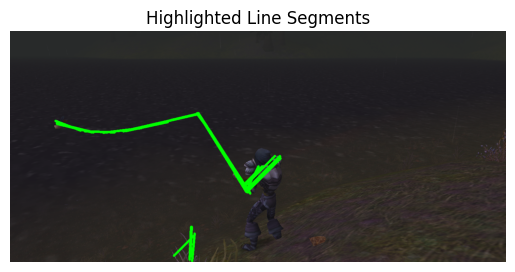

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

def partition_objects(objects, metric, threshold):
    """
    Partition objects into groups based on a metric and a threshold.

    :param objects: List of objects.
    :param metric: Function that takes two objects and returns their "distance".
    :param threshold: The threshold for grouping based on the metric.
    :return: List of groups (each group is a list of objects).
    """
    n = len(objects)
    # Step 1: Compute the distance matrix
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = metric(objects[i], objects[j])

    # Step 2: Perform hierarchical clustering using single linkage
    condensed_distance_matrix = distance_matrix[np.triu_indices(n, 1)]
    Z = linkage(condensed_distance_matrix, method='single')

    # Step 3: Form clusters based on the threshold
    labels = fcluster(Z, t=threshold, criterion='distance')

    # Step 4: Group objects based on the clusters
    groups = [[] for _ in range(max(labels))]
    for i, label in enumerate(labels):
        groups[label - 1].append(objects[i])

    return groups

# Example usage: Objects are points in a 2D space for simplicity
# objects = [(1, 2), (2, 3), (3, 4), (8, 8), (9, 9), (10, 10)]
# def euclidean_metric(obj1, obj2):
    # return np.sqrt((obj1[0] - obj2[0])**2 + (obj1[1] - obj2[1])**2)

# threshold = 5  # Distance threshold for grouping
# partitioned_groups = partition_objects(objects, euclidean_metric, threshold)
# print("Partitioned Groups:", partitioned_groups)


def filter_lines_by_angle(lines, angle_threshold):
    angles = []
    filtered_lines = []
    measured_lines = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Calculate the angle of the line in degrees
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        measured_lines.append((line, angle))
        # angles.append(angle)


    # print(angles)
    # print(len(angles))
    def metric(x, y):
        return abs(x[1] - y[1])
    vec = partition_objects(measured_lines, metric, 1)
    # print(vec)
    largest_group = max(vec, key=len)
    s = sorted(vec, key=len)
    # print(largest_group)
    print(s[-1])
    print(s[-2])
    for line, a in s[-2]:
        filtered_lines.append(line)

    return filtered_lines

def highlight_segments(image, min_length, angle_threshold):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Detect line segments using the Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, 
                            rho=1, 
                            theta=np.pi/180, 
                            threshold=50, 
                            minLineLength=min_length, 
                            maxLineGap=20)
    

    if lines is not None:

        for l in lines:
            x1, y1, x2, y2 = l[0]
            cv2.line(image, (x1, y1), (x2, y2), (0,255,0), 5)
        # Filter lines based on angle
        filtered_lines = filter_lines_by_angle(lines, angle_threshold)
        
        # Highlight the filtered line segments on the original image
        # for line in filtered_lines:
        #     x1, y1, x2, y2 = line[0]
        #     cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 5)
    
    return image

if __name__ == "__main__":
    # Load the image
    img_path = 'tmp/pole1.png'  # Replace with your image path
    image = cv2.imread(img_path)
    
    # Parameters
    min_length = 50  # Minimum length of line segments
    angle_threshold = 5  # Maximum angle difference in degrees
    
    # Highlight segments
    output_image = highlight_segments(image, min_length, angle_threshold)
    
    # Convert image to RGB (OpenCV uses BGR by default)
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    # Display the result using matplotlib
    plt.imshow(output_image_rgb)
    plt.title('Highlighted Line Segments')
    plt.axis('off')
    plt.show()


In [32]:
def partition_vector(vector, threshold):
    """
    Partition a vector into groups based on the absolute difference metric.

    :param vector: List of real values.
    :param threshold: The absolute difference threshold for grouping.
    :return: List of groups (each group is a list of values).
    """
    if not vector:
        return []

    # Step 1: Sort the vector
    sorted_vector = sorted(vector)

    # Step 2: Group values based on the threshold
    groups = []
    current_group = [sorted_vector[0]]

    for value in sorted_vector[1:]:
        if abs(value - current_group[-1]) <= threshold:
            current_group.append(value)
        else:
            groups.append(current_group)
            current_group = [value]
    
    # Add the last group
    groups.append(current_group)

    return groups

# Example usage
vector = [90, 91, 89, 95, 43, 32, 1, 190]
threshold = 1
partitioned_groups = partition_vector(vector, threshold)
print(partitioned_groups)

[[1], [32], [43], [89, 90, 91], [95], [190]]


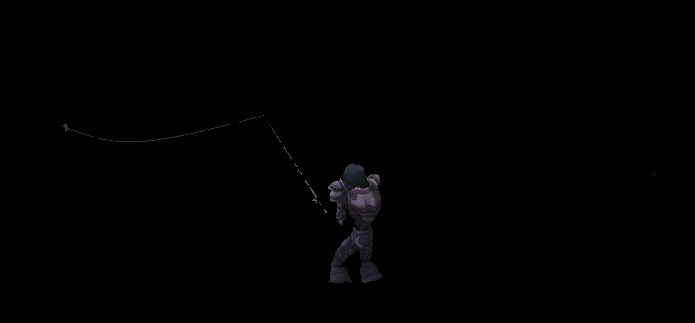

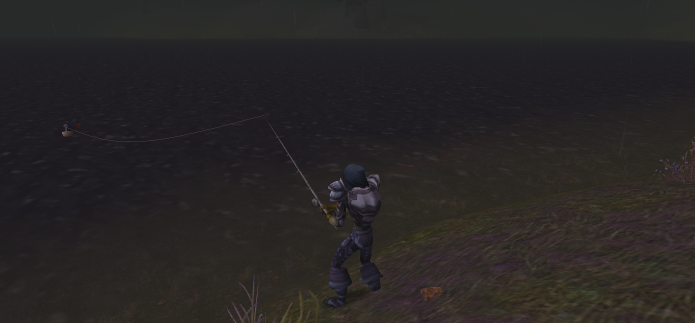

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display


def create_grabcut_mask(image, background_points):
    # Initialize mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Set known background points in the mask
    for point in background_points:
        mask[point[1], point[0]] = cv2.GC_BGD  # Set the point as definite background

    return mask

def run_grabcut(image, mask, rect):
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Apply the GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    return mask


image_path = 'tmp/pole1.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape
image = cv2.resize(image, (w //2, h//2), interpolation=cv2.INTER_LINEAR)
h, w, _ = image.shape
rect = (40, 40, w - 80, h - 80)  # Example rectangle; you may need to adjust it
# result = grabcut_segment(image_path, rect)


# Known background points (x, y)
background_points = [(80, 80), (w-80, 80), (w-80, h-80), (80, h -80)]  # Example points, use your known background points

# Create the initial GrabCut mask
mask = create_grabcut_mask(image, background_points)

# Run the GrabCut algorithm
mask = run_grabcut(image, mask, rect)

# Extract the foreground: where mask==1 or mask==3, those are the likely foreground
output_mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8)
foreground = image * output_mask[:, :, np.newaxis]
# foreground = image

pimg = Image.fromarray(foreground)
display(pimg)
pimg1 = Image.fromarray(image)
display(pimg1)

d:\tools\python312\Lib\site-packages\torch\nn\functional.py:3809: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


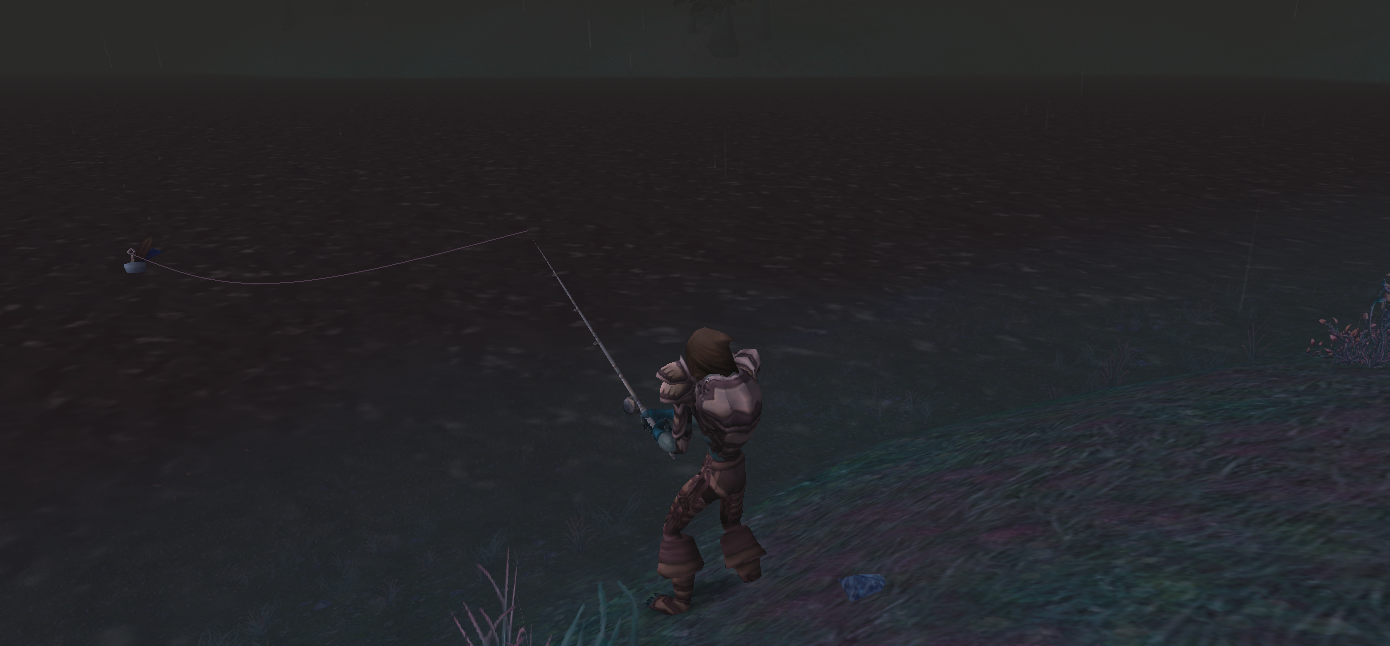

In [97]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
from torchvision import transforms
from PIL import Image
from U2Net.model.u2net import U2NET

# Load U2Net model


device = torch.device('cpu')

# Load U2Net model to CPU
model = U2NET(3, 1)
model.load_state_dict(torch.load('tmp/u2net.pth', map_location=device))
model.to(device)
model.eval()

# Image transformation
transform = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize((320, 320)),
   transforms.ToTensor(),
   transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

def remove_background(image):
   # Convert image to RGB format
   image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   im_pil = Image.fromarray(image_rgb)

   # Apply transformation and add batch dimension
   input_tensor = transform(np.array(im_pil)).unsqueeze(0)

   with torch.no_grad():
       output = model(input_tensor)
       prediction = torch.sigmoid(output[0])[0, 0].numpy()
       prediction = (prediction > 0.5).astype(np.uint8)

   # Resize prediction to original image size
   prediction = cv2.resize(prediction, (image.shape[1], image.shape[0]))

   # Mask the input image
   foreground = cv2.bitwise_and(image, image, mask=prediction * 255)
   return foreground

# Load original image
original_image = cv2.imread('tmp/pole1.png')

# Perform background removal
result = remove_background(original_image)

pimg = Image.fromarray(result)
display(pimg)

In [94]:
import torch
torch.cuda.is_available()
torch.zeros(1).cuda()

AssertionError: Torch not compiled with CUDA enabled

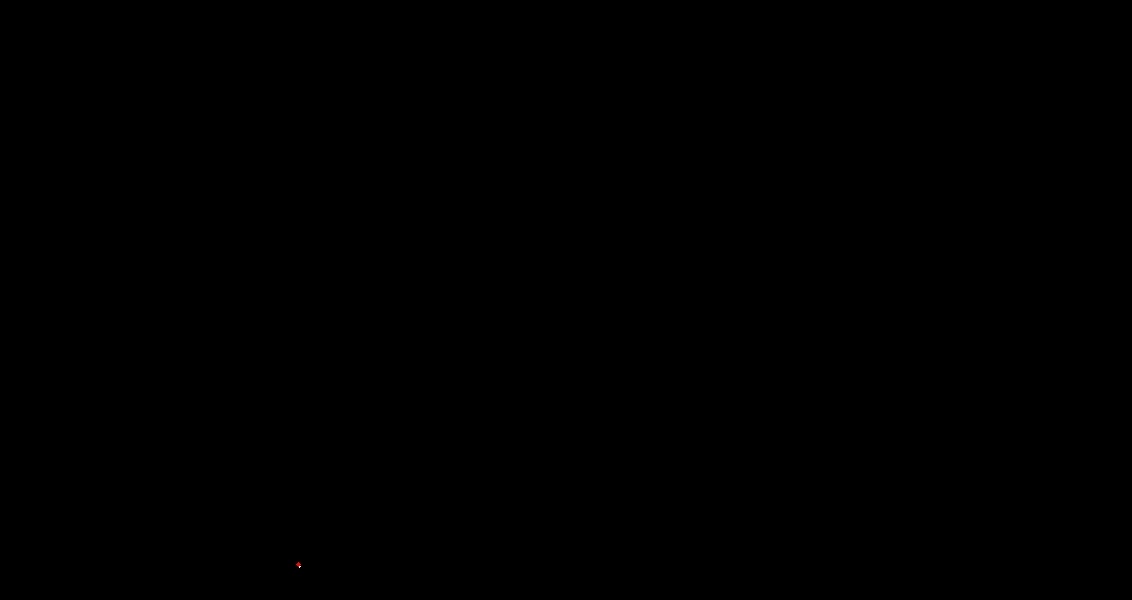

In [2]:
import cv2
import numpy as np
from PIL import Image as PILImage  # For converting to PIL Image for display
from IPython.display import display
from scipy.cluster.hierarchy import linkage, fcluster

# Load the image
image_path = 'tmp/pole8.png'
original_image = cv2.imread(image_path)

# Convert the image from BGR to LAB color space

def dis(*imgs):

    l = list(map(PILImage.fromarray, imgs))
    # i = PILImage.fromarray(img)
    display(*l)

def get_bobber_coords(original_image):
    image_lab = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)

# Extract the L, A, and B channels
    L, A, B = cv2.split(image_lab)

# Define masks for hot and cold colors
# Assuming LAB: hot colors will have higher A values (more red) and lower B values.
# Cold colors will have lower A values (more green) and higher B values (more blue).
    hot_mask = (A > 128) & (B < 128)
    cold_mask = (A < 128) & (B > 128)

# Ensure masks cover entire image without overlap
    non_overlap_hot_mask = hot_mask & ~cold_mask
    non_overlap_cold_mask = cold_mask & ~hot_mask

# Separate hot and cold parts based on masks
    hot_image_lab = np.zeros_like(image_lab)
    cold_image_lab = np.zeros_like(image_lab)
    hot_image_lab[non_overlap_hot_mask] = image_lab[non_overlap_hot_mask]
    cold_image_lab[non_overlap_cold_mask] = image_lab[non_overlap_cold_mask]

# Fill other parts with black to maintain image structure
    hot_image_lab[~non_overlap_hot_mask] = [0, 128, 128]  # Neutral black in LAB
    cold_image_lab[~non_overlap_cold_mask] = [0, 128, 128]  # Neutral black in LAB

# Convert the separated LAB images back to RGB color space for display
    hot_image_rgb = cv2.cvtColor(hot_image_lab, cv2.COLOR_LAB2RGB)
    cold_image_rgb = cv2.cvtColor(cold_image_lab, cv2.COLOR_LAB2RGB)

    string_img = cv2.cvtColor(hot_image_rgb, cv2.COLOR_RGB2GRAY)
    _, string_img = cv2.threshold(string_img, 100, 255, cv2.THRESH_BINARY)


    string_img1 = cv2.cvtColor(string_img, cv2.COLOR_GRAY2RGB)


# Display the hot and cold images
# dis(string_img1)

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(string_img, connectivity=8)

# Identify the largest connected component (excluding the background)
    largest_component = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])

# Create a mask for the largest connected component
    largest_component_mask = np.zeros_like(string_img)
    largest_component_mask[labels == largest_component] = 255

# dis(largest_component_mask)

# Convert to PIL Image for display
# largest_component_pil = PILImage.fromarray(largest_component_mask)

# Display the largest connected component
# display(largest_component_pil)

    binary_image = string_img
# Compute the center of the image
    center_x = binary_image.shape[1] // 2
    center_y = binary_image.shape[0] // 2
    center = np.array([center_x, center_y])

# Identify all points in the largest connected component
    component_points = np.column_stack(np.where(largest_component_mask == 255))

# Compute the Euclidean distance from each point to the image center
    distances = np.linalg.norm(component_points - center, axis=1)

# Find the point with the maximum distance
    max_distance_index = np.argmax(distances)
    farthest_point = component_points[max_distance_index]

# Display the largest connected component and the farthest point
    pt = (farthest_point[1], farthest_point[0])
    output_image = np.stack([largest_component_mask]*3, axis=-1) # Convert to 3 channel for display
    output_image = cv2.circle(output_image, pt, 2, (255, 0, 0), -1)  # Draw the farthest point as a red dot
    return output_image, pt

output_image, pt = get_bobber_coords(original_image)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
cv2.circle(original_image, pt, 2, (255, 0, 0), -1)  # Draw the farthest point as a red dot

dis(output_image)
# dis(original_image, output_image)

In [65]:
def f(*x):
    l = list(map(int, x))

    print(l)

f('1', '2')

type(PILImage.fromarray)

[1, 2]


function

In [81]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tkinter import Scale

class ThresholdApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Thresholding Application")

        # Load image button
        self.btn_load = tk.Button(root, text="Load Image", command=self.load_image)
        self.btn_load.pack()

        # Create canvas to display images
        self.canvas = tk.Canvas(root, width=1500, height=900)
        self.canvas.pack()

        # Create Scale for controlling the threshold
        self.threshold_scale = Scale(root, from_=0, to=255, orient=tk.HORIZONTAL, label='Threshold', command=self.update_threshold, length=512)
        self.threshold_scale.pack()

        self.original_image = None
        self.display_image = None

    def load_image(self):
        file_path = filedialog.askopenfilename()
        if not file_path:
            return

        self.original_image = cv2.imread(file_path)
        t = self.original_image.copy()
        self.original_image = cv2.cvtColor(t, cv2.COLOR_BGR2LAB)
        self.display_image = self.original_image.copy()
        self.update_display()

    def update_threshold(self, value):
        if self.original_image is None:
            return

        # _, self.display_image = cv2.threshold(self.original_image, int(value), 255, cv2.THRESH_BINARY)
        L, A, B = cv2.split(self.original_image)

        value = int(value)
        hot_mask = (A > value) & (B < value)
        cold_mask = (A < value) & (B > value)

        non_overlap_hot_mask = hot_mask & ~cold_mask
        non_overlap_cold_mask = cold_mask & ~hot_mask

        hot_image_lab = np.zeros_like(self.display_image)
        cold_image_lab = np.zeros_like(self.display_image)
        hot_image_lab[non_overlap_hot_mask] = self.original_image[non_overlap_hot_mask]
        cold_image_lab[non_overlap_cold_mask] = self.original_image[non_overlap_cold_mask]

# Fill other parts with black to maintain image structure
        hot_image_lab[~non_overlap_hot_mask] = [0, 128, 128]  # Neutral black in LAB
        cold_image_lab[~non_overlap_cold_mask] = [0, 128, 128]  # Neutral black in LAB
        
        hot_image_lab[~non_overlap_hot_mask] = [0, 128, 128]
        cold_image_lab[~non_overlap_cold_mask] = [0, 128, 128]  # Neutral black in LAB

# Convert the separated LAB images back to RGB color space for display
        # hot_image_rgb = cv2.cvtColor(hot_image_lab, cv2.COLOR_LAB2RGB)
        # cold_image_rgb = cv2.cvtColor(cold_image_lab, cv2.COLOR_LAB2RGB)
        self.display_image = cv2.cvtColor(hot_image_lab, cv2.COLOR_LAB2RGB)

        self.update_display()

    def update_display(self):
        if self.display_image is None:
            return

        image = Image.fromarray(self.display_image)
        imgtk = ImageTk.PhotoImage(image=image)
        self.canvas.create_image(0, 0, anchor=tk.NW, image=imgtk)
        self.canvas.image = imgtk

if __name__ == "__main__":
    root = tk.Tk()
    app = ThresholdApp(root)
    root.mainloop()

None
None
None
None
None
None
None
None
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0 326 120]]

 [[306  47 340 182]]]
None
[[[294   0 323 116]]

 [[296   0

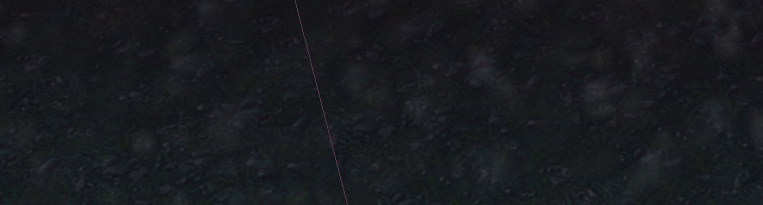

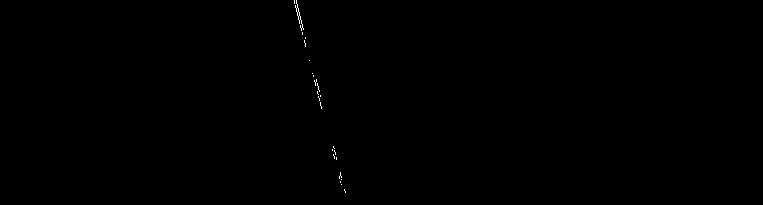

In [88]:
from IPython.display import display
import cv2 as cv

img = cv.imread('tmp/fishline1.png')

import cv2
import numpy as np

def adaptive_canny_strong_edges(image, initial_lower_threshold=230, initial_upper_threshold=240, step=10, max_iterations=200):
    """
    Apply adaptive step increase or decrease in threshold for Canny edge detector,
    focusing on detecting strong edges.
    """
    lower_threshold = initial_lower_threshold
    upper_threshold = initial_upper_threshold
    edges = cv2.Canny(image, lower_threshold, upper_threshold)
    iteration = 0
    
    while iteration < max_iterations:
        # Hough Line Transform to detect lines
        lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=10)
        print(lines)
        # Check for lines condition
        if lines is not None and len(lines) == 1:
            break  # Found one single line
        elif lines is not None and len(lines) > 1:
            # Multiple lines, increase the threshold
            lower_threshold += step
            upper_threshold += step
        else:
            # No lines or too few lines, decrease the threshold
            lower_threshold -= step
            upper_threshold -= step
        
        # Ensure the thresholds stay within valid range
        lower_threshold = max(0, min(lower_threshold, 255))
        upper_threshold = max(0, min(upper_threshold, 255))

        # Apply Canny edge detection with updated thresholds
        edges = cv2.Canny(image, lower_threshold, upper_threshold)
        iteration += 1

    return edges, lower_threshold, upper_threshold, lines

# Read the image
image = img
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adaptive Canny Edge Detection for strong edges
edges, lower_threshold, upper_threshold, lines = adaptive_canny_strong_edges(gray_image)
print(f"Canny thresholds - lower: {lower_threshold}, upper: {upper_threshold}")

# Draw the detected line on the original image
if lines is not None and len(lines) == 1:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("Unable to find a single line confidently.")



dis(img, edges)

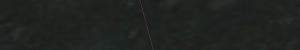

100
Best Thresholds: (10, 13)


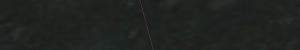

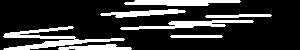

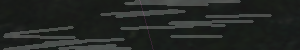

In [109]:
import cv2
import numpy as np

def count_non_black_pixels(img):
    # Returns the count of non-black pixels in the image
    return cv2.countNonZero(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def calculate_angle(x1, y1, x2, y2):
    return np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi

def calculate_line_length(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def find_best_canny_threshold_and_draw_lines(img, min_thresh_step=10, max_thresh_step=250, step_size=3, angle_tolerance=5):
    height, width, _ = img.shape
    
    best_thresholds = (0, 0)
    max_total_length = -float('inf')
    min_non_black_pixels = float('inf')
    best_lines_img = None

    for low_thresh in range(min_thresh_step, max_thresh_step, step_size):
        for high_thresh in range(low_thresh + step_size, max_thresh_step, step_size):
            edges = cv2.Canny(img, low_thresh, high_thresh)
            lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
            
            if lines is None or len(lines) < 1:
                continue
            
            dominant_angle = calculate_angle(lines[0][0][0], lines[0][0][1], lines[0][0][2], lines[0][0][3])
            consistent_lines = []
            total_length = 0
            for line in lines:
                x1, y1, x2, y2 = line[0]
                angle = calculate_angle(x1, y1, x2, y2)
                if abs(angle - dominant_angle) < angle_tolerance:
                    consistent_lines.append(line)
                    line_length = calculate_line_length(x1, y1, x2, y2)
                    total_length += line_length

            if len(consistent_lines) < 1:
                continue
            
            lines_img = np.zeros_like(img)
            for line in consistent_lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(lines_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

            combined_img = cv2.bitwise_or(edges, cv2.cvtColor(lines_img, cv2.COLOR_BGR2GRAY))
            non_black_pixels_count = count_non_black_pixels(cv2.cvtColor(combined_img, cv2.COLOR_GRAY2BGR))

            if total_length > max_total_length or (total_length == max_total_length and non_black_pixels_count < min_non_black_pixels):
                max_total_length = total_length
                min_non_black_pixels = non_black_pixels_count
                best_thresholds = (low_thresh, high_thresh)
                best_lines_img = lines_img
                
    return best_thresholds, best_lines_img

# Load your image
img = cv2.imread('tmp/fishline2.png')

h,w,_ = img.shape

img = crop_image(img, Rect(0,0,w,h//2))
dis(img)
print(h)

# Find the best Canny thresholds and draw lines
best_thresholds, best_lines_img = find_best_canny_threshold_and_draw_lines(img)

print(f"Best Thresholds: {best_thresholds}")

if best_lines_img is not None:
    result_img = cv2.addWeighted(img, 0.8, best_lines_img, 0.2, 0)
    # Save or display the result
else:
    print("No lines detected.")

dis(img, best_lines_img, result_img)


# edg = cv.Canny(img, 62, 96)
# dis(edg)

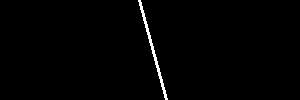

In [101]:
import cv2
import numpy as np
from collections import Counter


mask = best_lines_img
kernel_size = (3, 3)  # Modify this based on your requirements
elliptical_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
mask = cv2.erode(mask, elliptical_kernel, iterations=1)
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
dis(mask)

# print(img.shape, mask.shape)

# Calculate the most prevalent color and get the masked image
# most_common_color, masked_image = most_prevalent_color(image, mask)
# dis(masked_image)
# out = cv.inRange(img, most_common_color, most_common_color)
# dis(out)

# print(f"Most Prevalent Color (in BGR): {most_common_color}")


[(0, 0, 0), (64, 44, 60)]


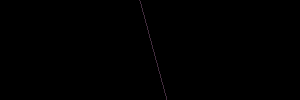

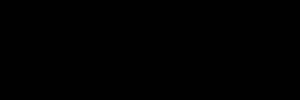

In [102]:
def run_grabcut(image, binary_mask):
    # Define the mask for the grabCut algorithm with the same size as the image
    grabcut_mask = np.zeros(image.shape[:2], np.uint8)

    # Mark the sure background (0) and probable background (2) regions in the grabcut mask
    grabcut_mask[binary_mask == 0] = cv2.GC_BGD  # Definitely background
    grabcut_mask[binary_mask == 255] = cv2.GC_PR_FGD  # Probably foreground
    
    # You can enhance the mask by labeling definite foreground regions (optional)
    # For example, if you have certain information about definite foreground, you can set:
    # grabcut_mask[definite_foreground_mask == 1] = cv2.GC_FGD

    # Create the models for GrabCut (they are just placeholders, required by the function)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Apply the grabCut algorithm
    cv2.grabCut(image, grabcut_mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

    # Create the final mask where definite and probable foreground are set to 1, background to 0
    final_mask = np.where((grabcut_mask == cv2.GC_FGD) | (grabcut_mask == cv2.GC_PR_FGD), 1, 0).astype('uint8')

    # Extract the segmented image using the final mask
    segmented_image = cv2.bitwise_and(image, image, mask=final_mask)

    return segmented_image, final_mask


s, m = run_grabcut(img, mask)

pixels = s.reshape(-1, 3)
unique_colors_set = set([tuple(pixel) for pixel in pixels])
unique_colors = sorted(unique_colors_set)
print(unique_colors)
dis(s, m)

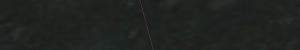

(0, 0)


AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [104]:
import cv2 as cv
import numpy as np

# Load your image
img = cv2.imread('tmp/fishline2.png')
from common import crop_image, Rect

h, w, _ = img.shape

img = crop_image(img, Rect(0, 0, w, h//2))

dis(img)

# Find the best Canny thresholds and draw lines
best_thresholds, best_lines_img = find_best_canny_threshold_and_draw_lines(img)
print(best_thresholds)

dis(best_lines_img)
mask = best_lines_img
kernel_size = (3, 3)  # Modify this based on your requirements
elliptical_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
mask = cv2.erode(mask, elliptical_kernel, iterations=1)
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)


s, m = run_grabcut(img, mask)

pixels = s.reshape(-1, 3)
unique_colors_set = set([tuple(pixel) for pixel in pixels])
unique_colors.remove((0,0,0))
unique_colors = sorted(unique_colors_set)
print(unique_colors)
dis(s, m)

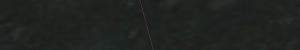

[(0, 0, 0), (64, 44, 60)]


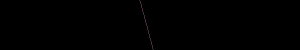

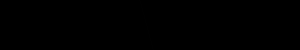

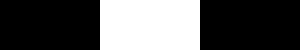

In [169]:
import cv2 as cv
import numpy as np

# Load your image
img = cv2.imread('tmp/fishline2.png')
from common import crop_image, Rect

h, w, _ = img.shape

img = crop_image(img, Rect(0, 0, w, h//2))

dis(img)

mask = np.zeros((h//2, w), dtype=np.uint8)

cv.rectangle(mask, Rect(w//3, 0, w//3, h//2).xywh(), (255), -1) 

s, m = run_grabcut(img, mask)

pixels = s.reshape(-1, 3)
unique_colors_set = set([tuple(pixel) for pixel in pixels])
# unique_colors.remove((0,0,0))
unique_colors = sorted(unique_colors_set)
print(unique_colors)
dis(s, m, mask)

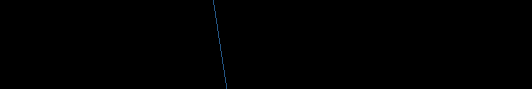

[(36, 84, 130)]
(36, 84, 130) (36, 84, 130)
<class 'numpy.int32'>


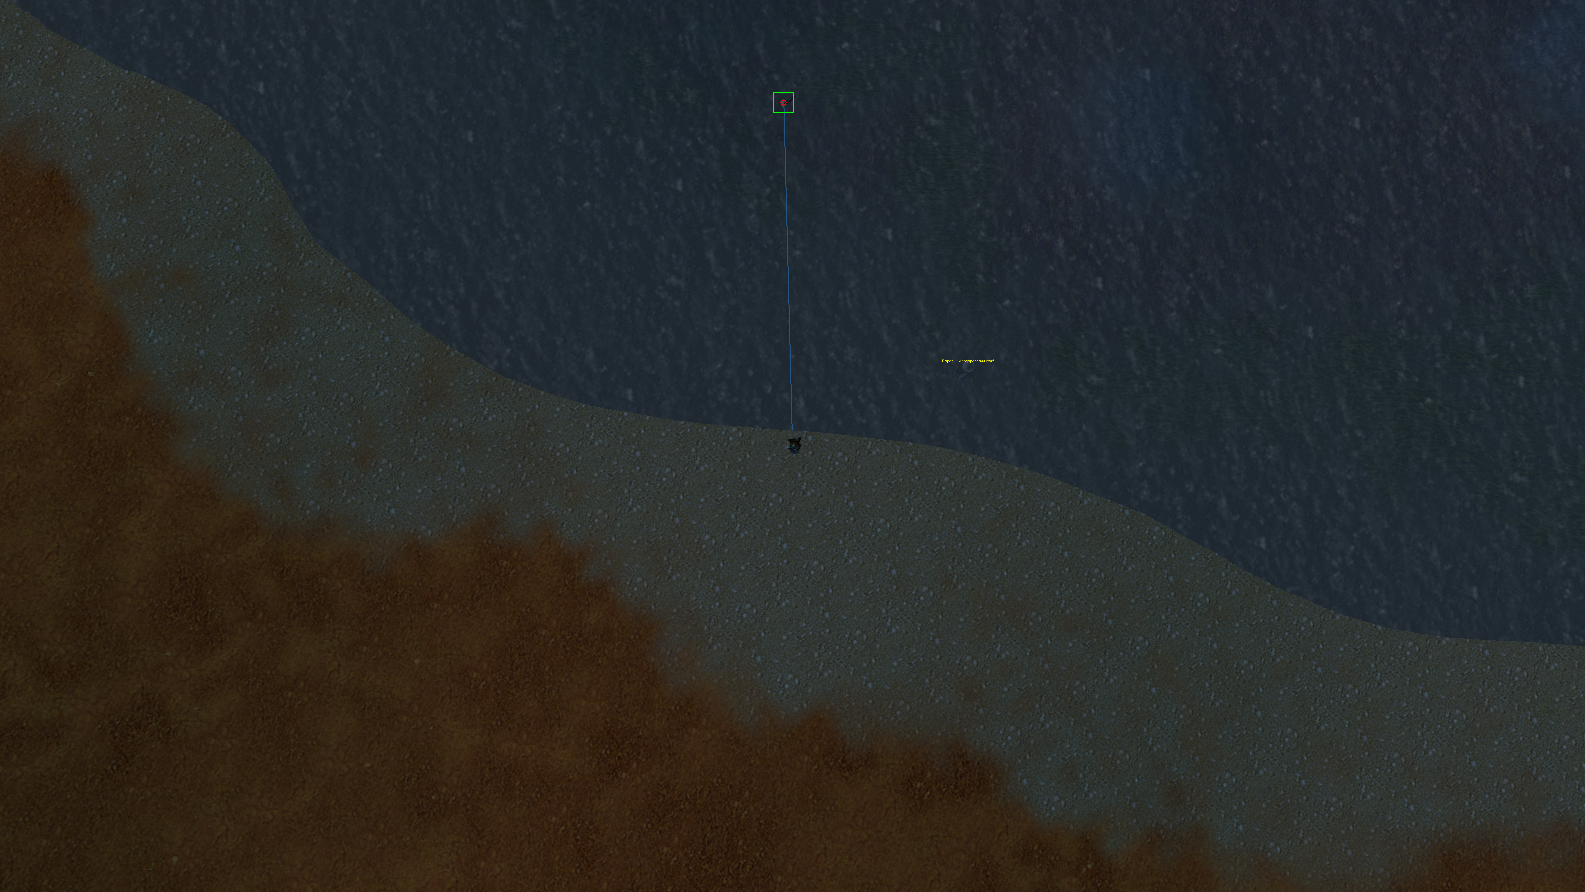

In [152]:
import cv2 as cv
import numpy as np

# Load your image
img = cv2.imread('tmp/fishline194.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
from common import crop_image, Rect

dis(img)

pixels = img.reshape(-1, 3)
unique_colors_set = set([tuple(pixel.astype(int)) for pixel in pixels])
unique_colors = sorted(unique_colors_set)
unique_colors.remove((0,0,0))
unique_colors = list(unique_colors)
print(unique_colors)
fr = cv2.imread('tmp/frame1.png')
fr = cv.cvtColor(fr, cv.COLOR_BGR2RGB)
print(unique_colors[0], unique_colors[-1])
print(type(unique_colors[0][0]))
lob = np.array(unique_colors[0])
hib = np.array(unique_colors[-1])
fl = cv.inRange(fr, lob, hib)



non_black_coords = np.argwhere(fl > 0)

# Calculate the center of the image
center_pixels_9 = np.array(fl.shape) // 2

# Compute the Euclidean distance of each non-black pixel from the center
distances = np.sqrt((non_black_coords[:, 0] - center_pixels_9[0]) ** 2 + (non_black_coords[:, 1] - center_pixels_9[1]) ** 2)

# Identify the farthest non-black pixel
farthest_index = np.argmax(distances)
farthest_pixel_coords = non_black_coords[farthest_index]
yx = farthest_pixel_coords
xy = np.array((yx[1], yx[0]))
ofs = np.array((10,10))
cv.circle(fr, xy, 3, (255, 0,0), 1)
cv.rectangle(fr, xy - ofs, xy + ofs, (0, 255,0), 1 )
dis(fr)

True
[0, 0, 0, 0, 0, 0, 0, 0, 0]
False


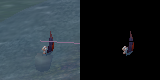

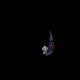

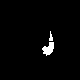

AttributeError: 'numpy.ndarray' object has no attribute 'ahk'

In [176]:
import cv2 as cv
import numpy as np
import itertools


def is_bobber_drown(segmented_bobber_img):
    seg = segmented_bobber_img
    h, w, _ = seg.shape
    bobber_wh = np.array((w, h))
    gr = cv.cvtColor(seg, cv.COLOR_RGB2GRAY)
    msk = (gr != 0).astype(np.uint8) * 255
    sp = itertools.product([-1, 0, 1], [-1, 0, 1])
    center_pixels_9 = [msk[*(bobber_wh // 2 + ofs)] for ofs in sp]
    return not np.any(center_pixels_9)


bobber = cv.imread('tmp/bobber/0081.bmp')
bobber = cv.cvtColor(bobber, cv.COLOR_BGR2RGB)
h, w, _ = bobber.shape
seg = bobber[:, w//2:w]

f = is_bobber_drown(seg)
print(f)

h, w, _ = seg.shape
bobber_wh = np.array((w, h))
gr = cv.cvtColor(seg, cv.COLOR_RGB2GRAY)
msk = (gr != 0).astype(np.uint8) * 255
sp = itertools.product([-1, 0, 1], [-1, 0, 1])
# print(list(sp))
center = [msk[*(bobber_wh // 2 + ofs)] for ofs in sp]
print(center)
print(np.any(center))
dis(bobber, seg, msk)
if not np.any(center):
    s.ahk.click(window_offset + bobber_coordinate)


In [179]:
import ahk as autohotkey
ahk = autohotkey.AHK()
ahk.right_click(x=1000,y=900)